In [ ]:
#imports

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns


#Load in the Obesity Dataset

obesity = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")


print(obesity[:200])

      Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  \
0    21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   
1    21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   
2    23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   
3    27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   
4    22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   
..    ...     ...     ...     ...         ...  ...   ...  ...  ...   ...   
195  19.0    Male    1.80    85.0   Sometimes  yes   3.0  3.0   no    no   
196  22.0    Male    1.75    74.0   Sometimes   no   2.0  3.0   no    no   
197  41.0    Male    1.75   118.0   Sometimes  yes   2.0  3.0   no    no   
198  18.0  Female    1.59    40.0          no  yes   2.0  1.0   no    no   
199  23.0  Female    1.66    60.0   Sometimes  yes   2.0  1.0   no    no   

     CH2O family_history_with_overweight  FAF  TUE        CAEC  \
0     2.0            

In [ ]:
#Describe the dataset
print(obesity.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [ ]:
#Remove missing values

obesity_null = obesity[obesity.isna().any(axis=1)]

if (len(obesity_null) == 0): #if there are no missing values
  print("No missing values")
else:
  print("There are missing values")

#There are no missing values to remove

No missing values


In [ ]:
#Removes all outliers from the dataset
upper_thres = 0
lower_thres = 0
no_outliers = obesity
cols = obesity.describe().columns #retreives all continuous categories

change = False
print(cols)
while True:
  for i in cols:
    temp = no_outliers.shape #shape before removal of outliers
    print(i)
    outliers = None
    #find first and third quartiles (anything not between these values is an outlier)
    q1, q3 = np.percentile(no_outliers[i], [25,75])
    iqr = q3 - q1
    upper_thres = q3 + 1.5*iqr
    lower_thres = q1 - 1.5*iqr
    print(lower_thres)
    print(upper_thres)
    no_outliers = no_outliers[(no_outliers[i] >= lower_thres) & (no_outliers[i] <= upper_thres)] #eliminate outliers
    print(no_outliers.shape)
    if (temp != no_outliers.shape): #if there were outliers in this category
      change = True #there was a change in the dataset
  if (change == False): #if there were no outliers detected throughout any category
    break #end loop
  change = False #set change to false and run the loop again


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Age
10.867980000000003
35.079212
(1943, 17)
Height
1.4263925
1.9771845000000003
(1942, 17)
Weight
0.044259500000009666
173.2595675
(1942, 17)
FCVC
0.5
4.5
(1942, 17)
NCP
2.1889881249999994
3.4866071250000004
(1398, 17)
CH2O
0.3670828750000006
3.8365558749999993
(1398, 17)
FAF
-2.0478178750000002
3.8221751250000002
(1398, 17)
TUE
-1.1855324999999999
2.3113194999999997
(1398, 17)
Age
10.788725249999997
35.09832325000001
(1398, 17)
Height
1.4616914999999997
1.9638475
(1395, 17)
Weight
5.791144750000001
177.01475875
(1395, 17)
FCVC
0.5
4.5
(1395, 17)
NCP
3.0
3.0
(1122, 17)
CH2O
0.33111625
3.98263825
(1122, 17)
FAF
-2.225167875
3.8882651249999998
(1122, 17)
TUE
-1.18124875
2.30874925
(1122, 17)
Age
11.000201750000002
34.999663749999996
(1120, 17)
Height
1.46530275
1.9578287499999998
(1120, 17)
Weight
3.2999661249999974
181.166723125
(1120, 17)
FCVC
0.5
4.5
(1120, 17)
NCP
3.0
3.0
(1120, 17)
CH2O
0.3340057

[]

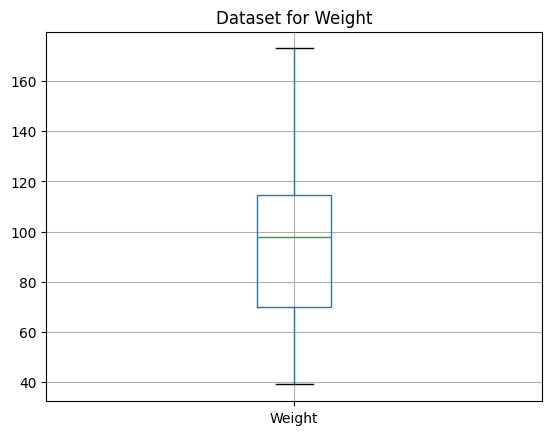

In [ ]:
#Shows box plot for weight category (shows that outliers are removed)

no_out_box = no_outliers.boxplot(column='Weight')
no_out_box.title.set_text('Dataset for Weight')
no_out_box.plot()



Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<Axes: >

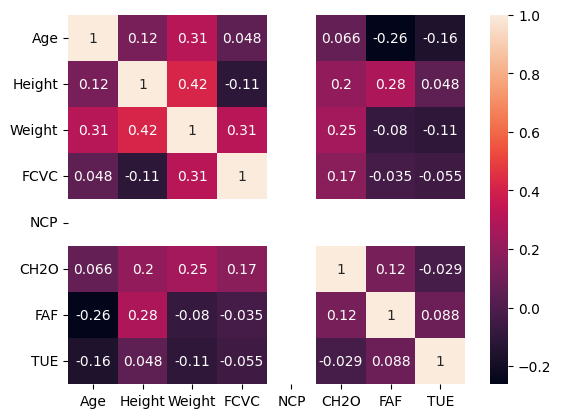

In [ ]:

#officially removes outliers from obesity dataset
obesity = no_outliers

print(obesity.columns)


obesity_num = obesity.select_dtypes(include='number') #collects only the numerical features of the dataset

matrix = obesity_num.corr() #computes the correlation matrix for the numerical values

sns.heatmap(matrix,annot=True) #creates the heatmap for the correlation matrix



In [ ]:
#encode categorical features that we used for the models, split dataset into training and testing sets

encode = pd.get_dummies(obesity, columns = ['Gender', 'family_history_with_overweight', 'CALC', 'CAEC', 'NObeyesdad'])

print(encode.columns)

#Sets X equal to the all the input variables
X = encode[['Height', 'Weight', 'Gender_Female', 'Gender_Male', 'CALC_Frequently',
            'CALC_Sometimes', 'CALC_no', 'family_history_with_overweight_no',
            'family_history_with_overweight_yes', 'CAEC_Always',
            'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no']].values

#Sets Y equal to the target varaible (If obese or not)
Y = encode[['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II']].values

#combine all target values types that are obese into binary value (True or False)
obesity['obese'] = encode['NObeyesdad_Obesity_Type_I'] | encode['NObeyesdad_Obesity_Type_II'] | encode['NObeyesdad_Obesity_Type_III'] | encode['NObeyesdad_Overweight_Level_I'] | encode['NObeyesdad_Overweight_Level_II']


#Counts total amount of people that are obese and not obese
true_count = 0
false_count = 0
for i in obesity['obese']:
  if (i == True):
    true_count += 1 #person is obese
  else:
    false_count += 1 #person is not obese

print(f"Total people that are obese: {true_count}\n")
print(f"Total people that are not obese: {false_count}\n")

#encode new binary obese category
encod = pd.get_dummies(obesity, columns=['obese'])

#Set Y equal to if you are obese
Y = encod['obese_True'].values

print(encod)
# split into 80% training data, 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_test.shape)



Index(['Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE',
       'CH2O', 'FAF', 'TUE', 'MTRANS', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')
Total people that are obese: 829

Total people that are not obese: 291

            Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   

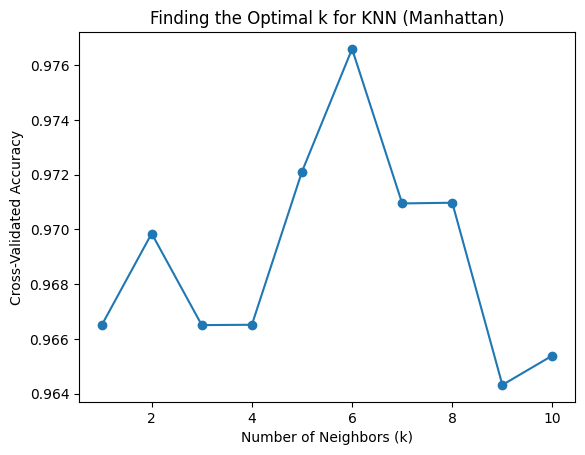

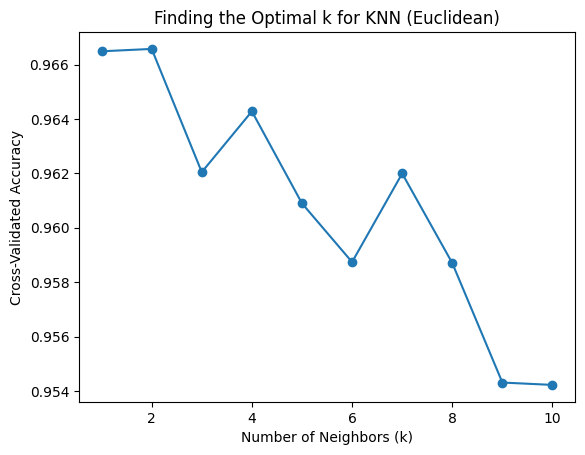

manhattan = [0.9664918851435707, 0.9698501872659175, 0.9665043695380774, 0.9665168539325842, 0.9721098626716606, 0.9765917602996256, 0.9709488139825219, 0.9709737827715357, 0.9643196004993759, 0.9653932584269663]

euclidean = [0.9664918851435707, 0.9665792759051186, 0.962047440699126, 0.9642821473158552, 0.9608988764044943, 0.9587390761548067, 0.9619975031210988, 0.9587016229712859, 0.9543071161048691, 0.9542197253433209]

maximum accuracy from manhattan = 0.9765917602996256

maximum accuracy from euclidean = 0.9665792759051186

The optimal k value is 6, with manhattan as the metric.
The accuracy of the dataset with 6 neighbors is 0.9598214285714286
The precision of the dataset with 6 neighbors is 0.9461382113821137
The recall of the dataset with 6 neighbors is 0.9509501797637391
The f1 score of the dataset with 6 neighbors is 0.9485070623994278


In [ ]:
# EVALUATION / MODEL COMPARISON

#K Nearest Neighbors

neighbors_man = []
neighbors = []
neighbors_euc = []
#examining neighbors 1-10
for i in range(1,11):
  #assigns KNN using manhattan distance
  knn_man = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  #10-fold cross validation
  kf = KFold(10,shuffle=True)
  #finds cross validation score
  score = cross_val_score(knn_man,X_train,Y_train,scoring = 'accuracy', cv=kf)
  #adds mean of these values to manhattan array
  neighbors_man.append(np.mean(score))

  #assigns KNN using euclidean distance
  knn_euc = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  #finds cross validation score
  score_euc = cross_val_score(knn_euc,X_train,Y_train,scoring = 'accuracy', cv=kf)
  #adds mean of these values to euclidean array
  neighbors_euc.append(np.mean(score_euc))

#Plots cross-validated accuracy vs number of neighbors for manhattan and euclidean
plt.plot(range(1,11), neighbors_man, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal k for KNN (Manhattan)')
plt.show()


plt.plot(range(1,11), neighbors_euc, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal k for KNN (Euclidean)')
plt.show()

print(f'manhattan = {neighbors_man}\n')
print(f'euclidean = {neighbors_euc}\n')

#finds optimal K value (neighbour with greatest average accuracy)
best_neighbors_man = neighbors_man.index(np.max(neighbors_man)) + 1
best_neighbors_euc = neighbors_euc.index(np.max(neighbors_euc)) + 1

print(f'maximum accuracy from manhattan = {neighbors_man[best_neighbors_man-1]}\n')
print(f'maximum accuracy from euclidean = {neighbors_euc[best_neighbors_euc-1]}\n')

#if the best neighbor using manhattan is greater than the best neighbor using euclidean
if (neighbors_man[best_neighbors_man-1] >= neighbors_euc[best_neighbors_euc-1]):
  #manhattan is the better metric
  best_neighbors = best_neighbors_man
  best_metric = 'manhattan'
else:
  #euclidean is the better metric
  best_neighbors = best_neighbors_euc
  best_metric = 'euclidean'


print(f'The optimal k value is {best_neighbors}, with {best_metric} as the metric.')

#trains KNN with optimal K, metric
knn = KNeighborsClassifier(n_neighbors=best_neighbors, metric = best_metric).fit(X_train, Y_train)
y_pred_mod = knn.predict(X_test)

#finds all performance metrics
acc = metrics.accuracy_score(Y_test, y_pred_mod)

print(f"The accuracy of the dataset with {best_neighbors} neighbors is {acc}")

prec = metrics.precision_score(Y_test, y_pred_mod, average = 'macro')

print(f"The precision of the dataset with {best_neighbors} neighbors is {prec}")

recall = metrics.recall_score(Y_test, y_pred_mod, average = 'macro')

print(f"The recall of the dataset with {best_neighbors} neighbors is {recall}")

f1 = metrics.f1_score(Y_test, y_pred_mod, average = 'macro')

print(f"The f1 score of the dataset with {best_neighbors} neighbors is {f1}")



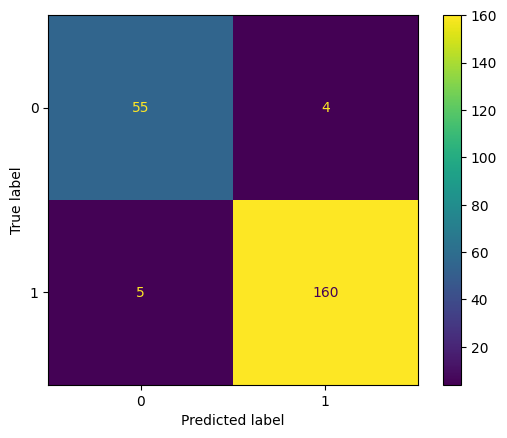

In [ ]:
#Plots confusion matrix for k nearest neighbors

conf_matrix = confusion_matrix(Y_test, y_pred_mod)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

conf_matrix_display.plot()
plt.show()

The accuracy of the data is 0.96875
The precision of the data is 0.9535045798486659
The recall of the data is 0.967899332306112
The f1 score of the data is 0.9603710162509161


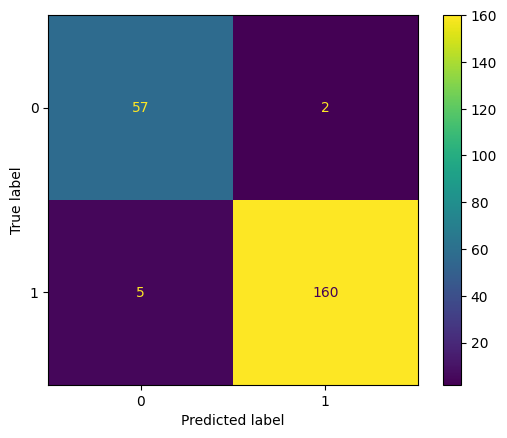

In [ ]:

#Decision Tree Classifier
clf = tree.DecisionTreeClassifier().fit(X_train, Y_train)

y_pred = clf.predict(X_test)

#Finds performance metrics
accuracy = accuracy_score(Y_test, y_pred)
print(f'The accuracy of the data is {accuracy}')

precision = precision_score(Y_test, y_pred, average = 'macro')
print(f"The precision of the data is {precision}")


recall = metrics.recall_score(Y_test, y_pred, average = 'macro')

print(f"The recall of the data is {recall}")

f1 = metrics.f1_score(Y_test, y_pred, average = 'macro')

print(f"The f1 score of the data is {f1}")

#Plots confusion matrix for decision tree
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

conf_matrix_display.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9732142857142857
Logistic Regression Precision: 0.9877300613496932
Logistic Regression Recall: 0.970929635336415
Logistric Regression F1: 0.9658536585365853


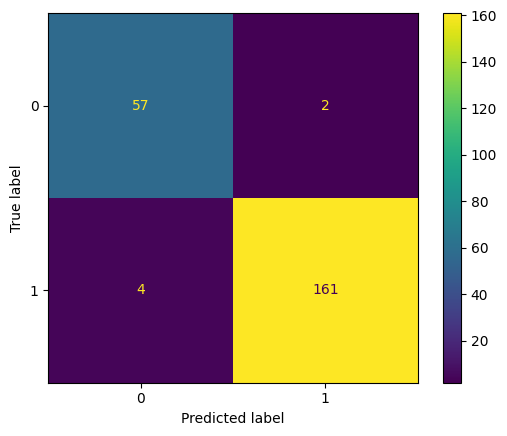

In [ ]:


# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42).fit(X_train, Y_train)

# Predict test data
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
accuracy_log = accuracy_score(Y_test, y_pred_log)
precision_log = precision_score(Y_test, y_pred_log)


recall_log = metrics.recall_score(Y_test, y_pred_log, average = 'macro')



f1_log = metrics.f1_score(Y_test, y_pred_log, average = 'macro')


print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"Logistic Regression Precision: {precision_log}")
print(f"Logistic Regression Recall: {recall_log}")
print(f"Logistric Regression F1: {f1_log}")

# Confusion Matrix
conf_matrix_log = confusion_matrix(Y_test, y_pred_log)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log).plot()
plt.show()



Random Forest Accuracy: 0.9642857142857143
Random Forest Precision: 0.9875776397515528
Random Forest Recall: 0.970929635336415
Random Forest F1: 0.9658536585365853


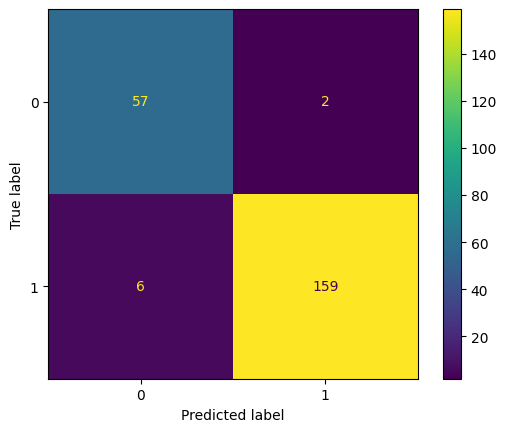

In [ ]:


# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, Y_train)

# Predict test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)

recall_rf = metrics.recall_score(Y_test, y_pred_log, average = 'macro')



f1_rf = metrics.f1_score(Y_test, y_pred_log, average = 'macro')


print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1: {f1_rf}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot()
plt.show()

SVM Accuracy: 0.9464285714285714
SVM Precision: 0.9580838323353293
SVM Recall: 0.9255264509501797
SVM F1: 0.930203572912339


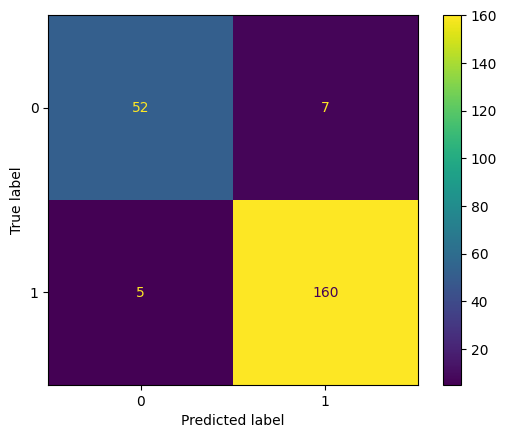

In [ ]:

# Train SVM model
svm_clf = SVC(kernel='rbf', random_state=42).fit(X_train, Y_train)

# Predict test data
y_pred_svm = svm_clf.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)

recall_svm = metrics.recall_score(Y_test, y_pred_svm, average = 'macro')



f1_svm = metrics.f1_score(Y_test, y_pred_svm, average = 'macro')



print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1: {f1_svm}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm).plot()
plt.show()


Naive Bayes Accuracy: 0.8616071428571429
Naive Bayes Precision: 0.9240506329113924
Naive Bayes Recall: 0.8407293271700051
Naive Bayes F1: 0.8280123839009288


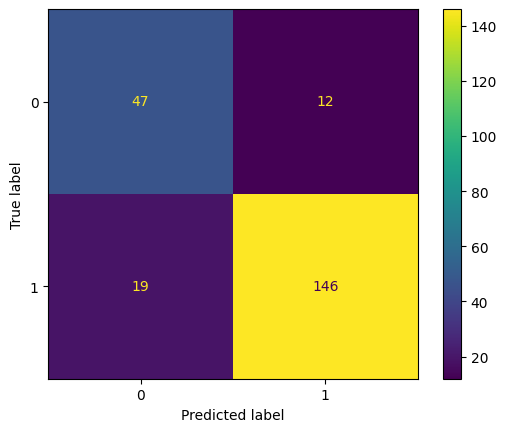

In [ ]:

# Train Naive Bayes model
nb_clf = GaussianNB().fit(X_train, Y_train)

# Predict test data
y_pred_nb = nb_clf.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
precision_nb = precision_score(Y_test, y_pred_nb)

recall_nb = metrics.recall_score(Y_test, y_pred_nb, average = 'macro')



f1_nb = metrics.f1_score(Y_test, y_pred_nb, average = 'macro')



print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"Naive Bayes F1: {f1_nb}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(Y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb).plot()
plt.show()


In [ ]:
#Model comparison for all models we used above

print("Model Comparison:")
print(f"KNN: Accuracy={acc}, Precision={prec}, Recall={recall_nb}, F1={f1_nb}")
print(f"Decision Tree: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}")
print(f"Random Forest: Accuracy={accuracy_rf}, Precision={precision_rf}, Recall={recall}")
print(f"SVM: Accuracy={accuracy_svm}, Precision={precision_svm}")
print(f"Logistic Regression: Accuracy={accuracy_log}, Precision={precision_log}")
print(f"Naive Bayes: Accuracy={accuracy_nb}, Precision={precision_nb}")


Model Comparison:
KNN: Accuracy=0.9598214285714286, Precision=0.9461382113821137, Recall=0.8407293271700051, F1=0.8280123839009288
Decision Tree: Accuracy=0.96875, Precision=0.9535045798486659, Recall=0.967899332306112, F1=0.9603710162509161
Random Forest: Accuracy=0.9642857142857143, Precision=0.9875776397515528, Recall=0.967899332306112
SVM: Accuracy=0.9464285714285714, Precision=0.9580838323353293
Logistic Regression: Accuracy=0.9732142857142857, Precision=0.9877300613496932
Naive Bayes: Accuracy=0.8616071428571429, Precision=0.9240506329113924
